<a href="https://colab.research.google.com/github/RohitPadala/Implementation-Of-Various-ML-Models/blob/main/Set2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**ASSIGNMENT 1 - LINEAR MODELS FOR REGRESSION AND CLASSIFICATION**
--------------------------------------------------------------------------------
***Team number: 1***

---
***Names of all students in the team:***
***Lokesh Aravind Saravanan, Shantanu Wadhwa, Shashank Kumar, Rohit Tulsi Padala, Siddarth Ceri***

---
***Id number of all students in the team:***
***2021AAPS2906H,2021A3PS2972H,2021A8PS1670H,2021AAPS1896H,2021B4A73145H***


This assignment aims to identify the differences between three sets of Machine Learning models.

# **_1. Dataset Generation_**

You are given a sample Diabetes dataset. Using this, please develop your own dataset consisting of 500 records. You can use the given code to generate your own dataset. Submit the generated dataset as a .csv file along with your python notebook.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/sdv_syn_data.csv')
#df = pd.read_csv('/water_portability.csv')
df.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,7,149,96,19,10,38.387409,0.561331,40,1
1,1,0,151,44,6,105,26.125923,0.463959,27,1
2,2,3,169,57,24,240,33.224573,0.541364,36,0
3,3,4,86,61,35,0,32.918264,0.526311,39,0
4,4,6,75,62,31,77,37.453830,0.178734,21,0


# ***2. Preprocess and perform exploratory data analysis of the dataset obtained***

In [ ]:
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
df.dtypes

Unnamed: 0                    int64
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 9)


In [ ]:
df.count()

Pregnancies                 500
Glucose                     500
BloodPressure               500
SkinThickness               500
Insulin                     500
BMI                         500
DiabetesPedigreeFunction    500
Age                         500
Outcome                     500
dtype: int64

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
zero_counts = (df == 0).sum()
print(zero_counts)

Pregnancies                  84
Glucose                       0
BloodPressure                 0
SkinThickness                45
Insulin                     124
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     335
dtype: int64


In [ ]:
columns_to_replace = ['SkinThickness', 'Insulin']

column_means = df[columns_to_replace].replace(0, np.nan).mean()

print(column_means)

SkinThickness     23.931868
Insulin          129.375000
dtype: float64


In [ ]:
df[columns_to_replace] = df[columns_to_replace].replace(0, column_means)

(df == 0).sum()

Pregnancies                  84
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     335
dtype: int64

<Axes: xlabel='Pregnancies'>

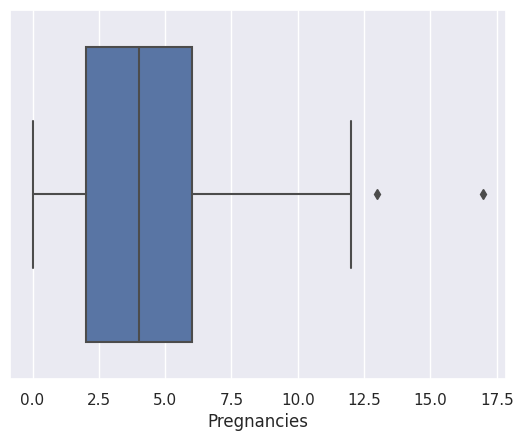

In [ ]:
sns.boxplot(x=df['Pregnancies'])

<Axes: xlabel='Glucose'>

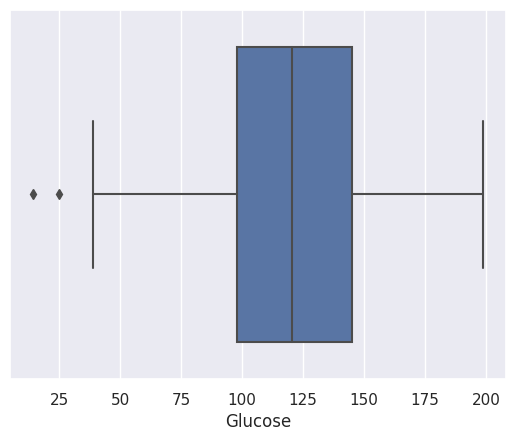

In [ ]:
sns.boxplot(x=df['Glucose'])

<Axes: xlabel='Insulin'>

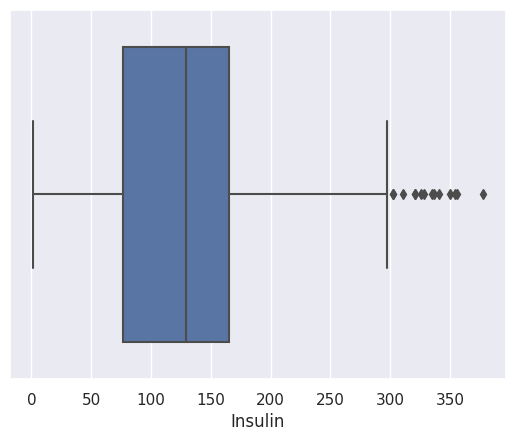

In [ ]:
sns.boxplot(x=df['Insulin'])

<Axes: xlabel='BMI'>

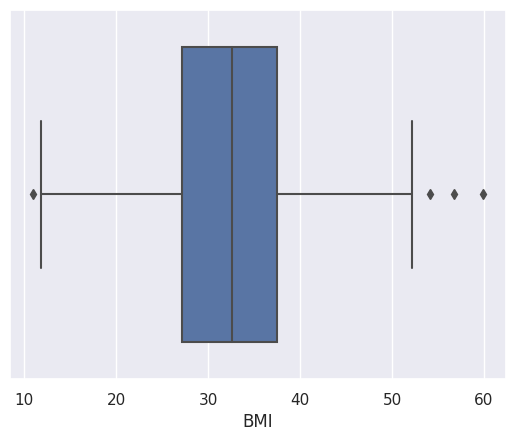

In [ ]:
sns.boxplot(x=df['BMI'])

In [ ]:
columns_to_check = ['Pregnancies', 'Glucose', 'Insulin', 'BMI']

Q1 = df[columns_to_check].quantile(0.25)
Q3 = df[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

print(IQR)

Pregnancies     4.000000
Glucose        47.000000
Insulin        88.000000
BMI            10.339549
dtype: float64


In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[~((df[columns_to_check] < lower_bound) | (df[columns_to_check] > upper_bound)).any(axis=1)]

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,3.970711,119.717573,70.792887,23.441285,123.589958,32.284435,0.509043,34.430962,0.320084
std,2.976353,32.582451,18.894416,11.833842,65.898077,7.641919,0.301038,10.014792,0.466997
min,0.000000,39.000000,22.000000,1.000000,1.000000,11.839588,0.078000,21.000000,0.000000
25%,2.000000,98.000000,58.000000,15.000000,74.000000,26.986684,0.251723,27.000000,0.000000
50%,4.000000,119.000000,70.000000,23.931868,129.375000,32.489935,0.507833,33.500000,0.000000
75%,6.000000,145.000000,84.000000,31.000000,159.750000,37.254830,0.728329,41.000000,1.000000
max,12.000000,199.000000,122.000000,55.000000,297.000000,52.119145,1.413874,70.000000,1.000000


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.070302,0.089660,-0.104164,0.029493,-0.038784,-0.125121,0.504567,0.140996
Glucose,0.070302,1.000000,0.116876,-0.048714,0.280236,0.269834,0.138523,0.244803,0.387602
BloodPressure,0.089660,0.116876,1.000000,0.171133,0.117303,0.286576,0.079943,0.208218,-0.007677
SkinThickness,-0.104164,-0.048714,0.171133,1.000000,0.102483,0.292345,0.108340,-0.136600,0.116610
Insulin,0.029493,0.280236,0.117303,0.102483,1.000000,0.119210,0.067038,0.004663,0.146821
BMI,-0.038784,0.269834,0.286576,0.292345,0.119210,1.000000,0.121790,0.015659,0.256267
DiabetesPedigreeFunction,-0.125121,0.138523,0.079943,0.108340,0.067038,0.121790,1.000000,-0.010281,0.115559
Age,0.504567,0.244803,0.208218,-0.136600,0.004663,0.015659,-0.010281,1.000000,0.099093
Outcome,0.140996,0.387602,-0.007677,0.116610,0.146821,0.256267,0.115559,0.099093,1.000000


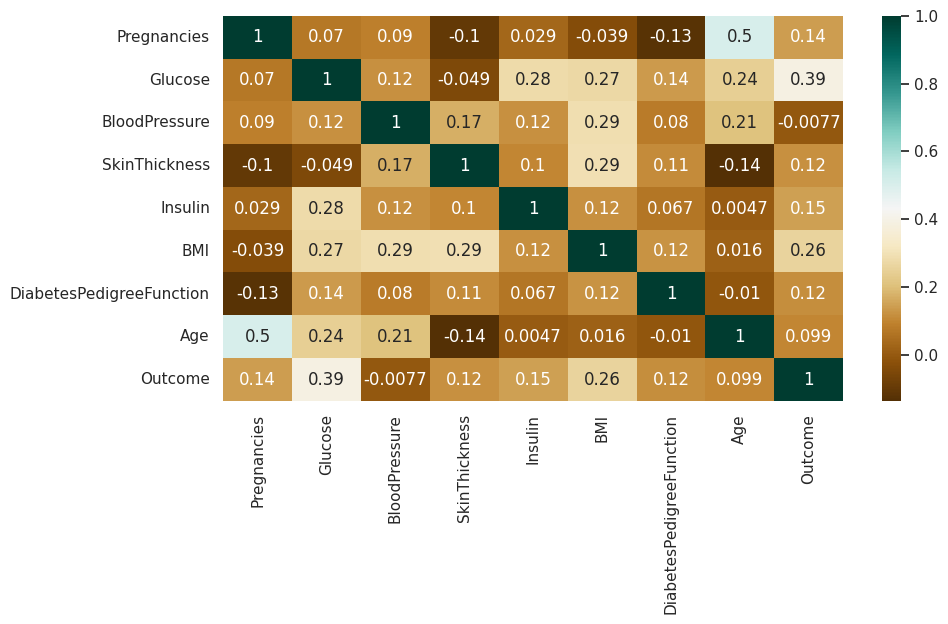

In [ ]:

plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

# ***3. Comparison of Stochastic Gradient Descent and Batch Gradient Descent using Linear Regression***

## **_Stochastic Gradient Descent_**

In [ ]:
def generateXvector(X):
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX

def theta_init(X):
    theta = np.random.randn(len(X[0])+1, 1)
    return theta

def Multivariable_Linear_Regression(X,y,learningrate, iterations):
    y_new = np.reshape(y, (len(y), 1))
    cost_lst = []
    vectorX = generateXvector(X)
    theta = theta_init(X)
    m = len(X)
    for i in range(iterations):
        gradients = (2/m) * vectorX.T.dot(vectorX.dot(theta) - y_new)
        theta = theta - learningrate * gradients
        y_pred = vectorX.dot(theta)
        cost_value = (1/(2*len(y))) * ((y_pred - y_new)**2) #Calculate the loss for each training instance
        total = 0
        for i in range(len(y)):
            total += cost_value[i][0] #Calculate the cost function for each iteration
        cost_lst.append(total)
    plt.plot(np.arange(iterations), cost_lst, color='red')
    plt.title('Cost function Graph')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    return theta, y_pred, cost_lst

In [ ]:
df_train = df.head(400)

df_test = df.iloc[400:]

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [ ]:
df_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000
mean,4.020000,120.002500,70.94500,23.503527,124.670000,32.240141,0.520576,34.41500,0.337500
std,3.032754,32.545053,18.81827,11.949726,65.385651,7.650506,0.299989,10.03916,0.473449
min,0.000000,39.000000,22.00000,1.000000,1.000000,11.839588,0.078000,21.00000,0.000000
25%,2.000000,98.000000,58.00000,15.000000,76.750000,26.959404,0.267510,27.00000,0.000000
50%,4.000000,120.500000,71.00000,23.931868,129.375000,32.593184,0.515739,33.50000,0.000000
75%,6.000000,145.000000,84.00000,32.000000,160.250000,37.253413,0.742935,41.25000,1.000000
max,12.000000,199.000000,122.00000,55.000000,296.000000,52.119145,1.413874,68.00000,1.000000


In [ ]:
df_test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,3.717949,118.256410,70.012821,23.122091,118.051282,32.511584,0.449896,34.512821,0.230769
std,2.672114,32.946015,19.385021,11.289529,68.632472,7.642932,0.301387,9.952802,0.424052
min,0.000000,41.000000,31.000000,2.000000,1.000000,14.781959,0.078000,21.000000,0.000000
25%,2.000000,96.000000,58.000000,16.250000,63.250000,27.048105,0.187249,27.000000,0.000000
50%,4.000000,117.500000,69.000000,22.000000,129.375000,31.960379,0.428172,33.500000,0.000000
75%,5.000000,145.500000,82.750000,30.750000,156.500000,38.049554,0.672724,41.000000,0.000000
max,12.000000,183.000000,122.000000,50.000000,297.000000,48.420547,1.298436,70.000000,1.000000


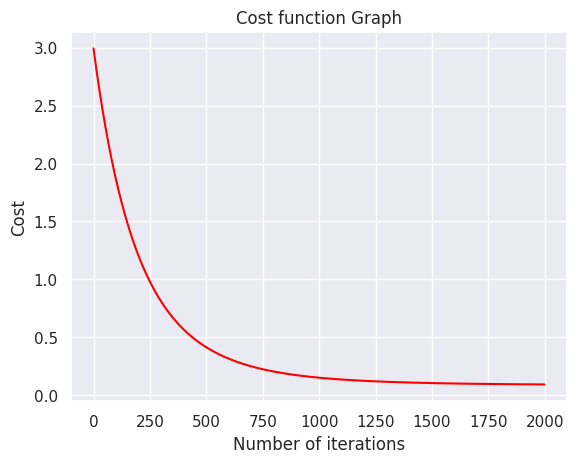

In [ ]:
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
selected_columns = df_train[columns]
x = selected_columns.to_numpy()
columns1 = ['Outcome']
output_column = df_train[columns1]
y_train = output_column.to_numpy()

learn_rate = 0.001
num_iteration = 2000
# Calculate the mean and standard deviation for each feature
mean = np.mean(x, axis=0)
std = np.std(x, axis=0)

# Standardizing  the dataset
X_train = (x - mean) / std

weights, pred, error= Multivariable_Linear_Regression(X_train,y_train,learn_rate,num_iteration)

In [ ]:
print(weights)

[[ 0.33689457]
 [ 0.15064153]
 [ 0.248877  ]
 [-0.05264443]
 [ 0.12384556]
 [-0.06552874]
 [ 0.04192158]
 [ 0.00763544]
 [-0.0790057 ]]


In [ ]:
selected_columns = df_test[columns]
x = selected_columns.to_numpy()

X_test = (x - mean) / std

vectorX = generateXvector(X_test)

predicted = np.dot(weights.T, vectorX.T)

threshold = 0.5
predicted = (predicted > threshold).astype(int)

In [ ]:
y = df_test['Outcome']
y_test = y.to_numpy()

In [ ]:
count = sum(predicted[0]== y_test[0])

In [ ]:
accuracy = count/len(y) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 71.79%


## **_Batch Gradient Descent_**

Bias =  [0.3375]
Coefficients =  [[ 0.07750892]
 [ 0.17292412]
 [-0.05429895]
 [ 0.06619166]
 [-0.00732787]
 [ 0.07756036]
 [ 0.01531501]
 [-0.00434193]]


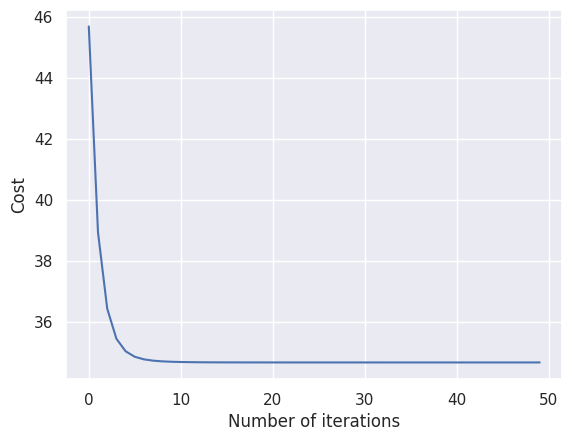

In [ ]:

def hypothesis(X, theta):
    return np.dot(X, theta)

def gradient(X, y, theta):
    h = hypothesis(X, theta)
    grad = np.dot(X.transpose(), (h - y))
    return grad

def cost(X, y, theta):
    h = hypothesis(X, theta)
    J = np.dot((h - y).transpose(), (h - y))
    J /= 2
    return J[0]


def gradientDescent(X, y, learning_rate=0.001):
    theta = np.zeros((X.shape[1], 1))
    error_list = []
    max_iters = 50
    for itr in range(max_iters):
        grad = gradient(X, y, theta)
        theta = theta - learning_rate * grad
        error_list.append(cost(X, y, theta))

    return theta, error_list

X_BGD = generateXvector(X_train)
y_train = y_train.reshape(-1,1)
theta, error_list = gradientDescent(X_BGD, y_train)
print("Bias = ", theta[0])
print("Coefficients = ", theta[1:])

# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [ ]:
vectorX = generateXvector(X_test)

predicted = np.dot(theta.T, vectorX.T)

threshold = 0.5
predicted = (predicted > threshold).astype(int)

In [ ]:
count = sum(predicted[0] == y_test[0])

accuracy = count/len(y) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 79.49%


## **_Insights drawn (plots, markdown explanations)_**

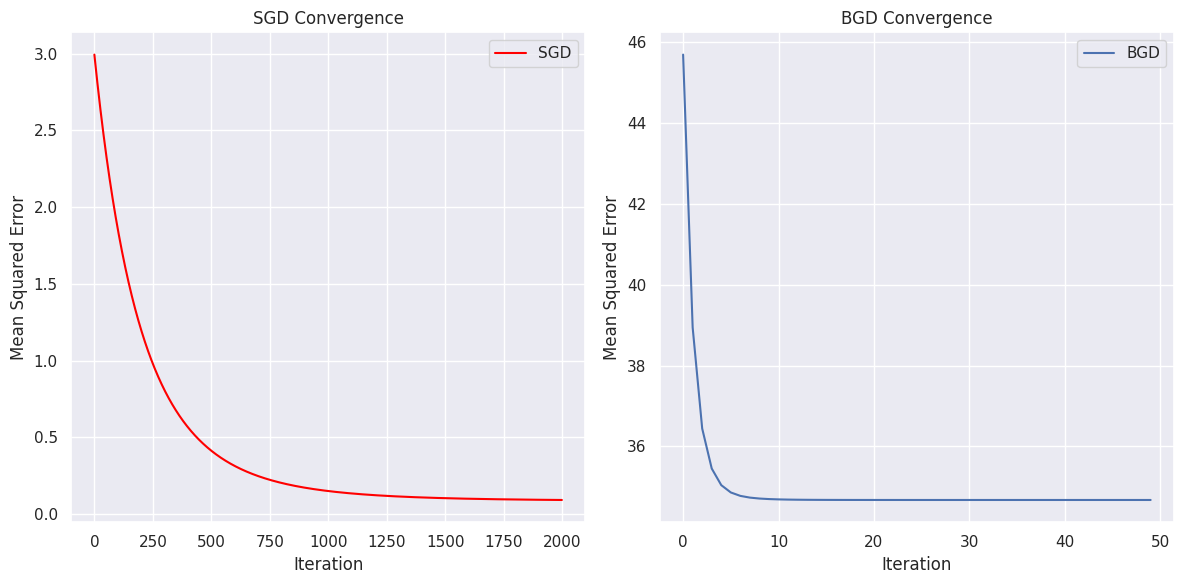

In [ ]:
# Create a plot of SGD vs. BGD convergence
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(error, label='SGD', color='red')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('SGD Convergence')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(error_list, label='BGD')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('BGD Convergence')
plt.legend()

plt.tight_layout()
plt.show()


# Insights from SGD and BGD Comparison

In our analysis of linear regression using Stochastic Gradient Descent (SGD) and Batch Gradient Descent (BGD), we gained valuable insights into the optimization algorithms' performance.

## Smooth Convergence

Both SGD and BGD exhibit smooth convergence as demonstrated by the cost function graphs. This smoothness indicates that both optimization algorithms effectively minimize the cost function over iterations.

## Lower MSE with SGD

SGD achieves a lower final Mean Squared Error (MSE) compared to BGD. The MSE measures the proximity of the model's predictions to the training data, and a lower MSE suggests that the model fits the training data more closely.

## Trade-off with Accuracy

While SGD achieves a lower MSE, it might not necessarily translate into higher accuracy in terms of generalization to unseen data. In some instances, we observed that despite the lower MSE, SGD may exhibit lower accuracy when applied to validation or test datasets.

This trade-off highlights an important aspect of machine learning. Optimizing solely for training data performance (MSE) can lead to overfitting, where the model becomes too specialized in fitting the training data but struggles to generalize to new, unseen data. Consequently, the model's predictions may be less accurate in real-world scenarios.

In summary, while SGD's lower MSE is a significant observation, the ultimate objective is to develop a model that performs well not only on the training data but also on new and unseen data.


# **_4. Comparison of Lasso and Ridge Regression using Polynomial Regression_**

## **_Lasso Regression_**

In [ ]:
def regularization_penalty(lamda, q, theta):
    if q == 1:
        penalty = lamda * np.sign(theta)
    elif q == 2:
        penalty = 2 * lamda * theta
    return penalty

In [ ]:

def hypothesis(X, theta):
	return np.dot(X, theta)

def gradient(X, y, theta):
	h = hypothesis(X, theta)
	grad = np.dot(X.transpose(), (h - y))
	return grad


def cost(X, y, theta):
	h = hypothesis(X, theta)
	J = np.dot((h - y).transpose(), (h - y))
	J /= 2
	return J[0]

def gradientDescentWithLasso(X, y, learning_rate=0.001):
	theta = np.zeros((X.shape[1], 1))
	error_list = []
	max_iters = 30
	for itr in range(max_iters):
		grad = gradient(X, y, theta)
		theta = theta - learning_rate * (grad + regularization_penalty(0.01, 1, theta))
		error_list.append(cost(X, y, theta))

	return theta, error_list

Bias =  [0.33747493]
Coefficients =  [[ 0.07725518]
 [ 0.1727492 ]
 [-0.05432385]
 [ 0.06614718]
 [-0.00722823]
 [ 0.07758991]
 [ 0.01529258]
 [-0.00404009]]


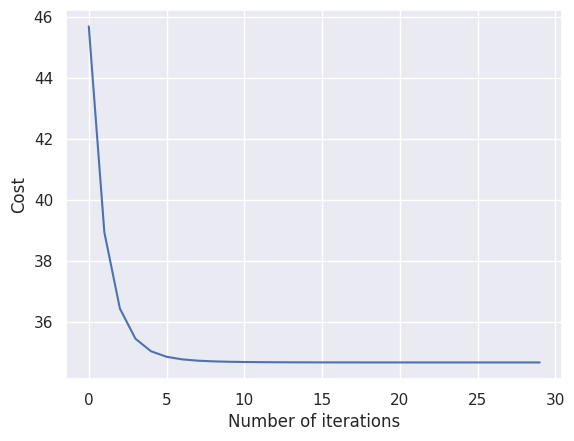

In [ ]:
X_lasso = generateXvector(X_train)
theta_lasso, error_list_lasso = gradientDescentWithLasso(X_lasso, y_train)
print("Bias = ", theta_lasso[0])
print("Coefficients = ", theta_lasso[1:])

# visualising gradient descent
plt.plot(error_list_lasso)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [ ]:
vectorX = generateXvector(X_test)

predicted = np.dot(theta_lasso.T, vectorX.T)

threshold = 0.5
predicted = (predicted > threshold).astype(int)

In [ ]:
count = sum(predicted[0] == y_test[0])

accuracy = count/len(y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 79.49%


## **_Ridge Regression_**

In [ ]:
def gradientDescentWithRidge(X, y, learning_rate=0.001):
	theta = np.zeros((X.shape[1], 1))
	error_list = []
	max_iters = 50
	for itr in range(max_iters):
		grad = gradient(X, y, theta)
		theta = theta - learning_rate * (grad + regularization_penalty(0.01, 2, theta))
		error_list.append(cost(X, y, theta))

	return theta, error_list

Bias =  [0.33748313]
Coefficients =  [[ 0.07750217]
 [ 0.1729132 ]
 [-0.05429432]
 [ 0.06618702]
 [-0.0073244 ]
 [ 0.07755818]
 [ 0.01531537]
 [-0.00433686]]


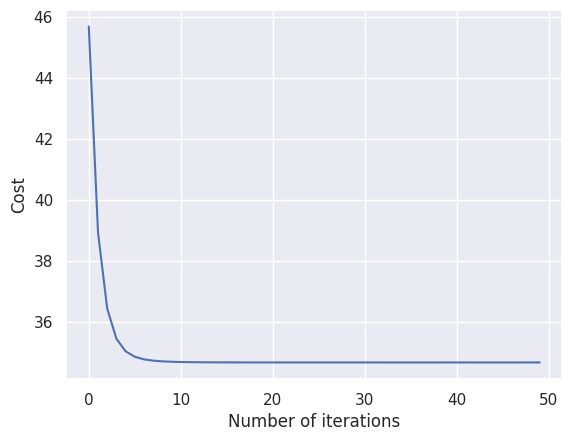

In [ ]:
X_ridge = generateXvector(X_train)
theta_ridge, error_list_ridge = gradientDescentWithRidge(X_ridge, y_train)
print("Bias = ", theta_ridge[0])
print("Coefficients = ", theta_ridge[1:])

# visualising gradient descent
plt.plot(error_list_ridge)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [ ]:
vectorX = generateXvector(X_test)

predicted = np.dot(theta_ridge.T, vectorX.T)

threshold = 0.5
predicted = (predicted > threshold).astype(int)

In [ ]:
count = sum(predicted[0] == y_test[0])

accuracy = count/len(y_test) * 100
print(f"Accuracy: {accuracy:.2f}%")

Accuracy: 79.49%


## **_Insights drawn (plots, markdown explanations)_**


Lasso and Ridge regression are both regularization techniques used in linear regression to mitigate issues like overfitting. They add penalty terms to the linear regression equation to control the complexity of the model.

--> Objective Function:

Ridge Regression: It adds a penalty term equal to the square of the magnitude of coefficients, resulting in the L2 regularization term. The objective function for Ridge is to minimize the sum of squared residuals plus the L2 penalty term.

Lasso Regression: It adds a penalty term equal to the absolute value of coefficients, resulting in the L1 regularization term. The objective function for Lasso is to minimize the sum of squared residuals plus the L1 penalty term.

--> Coefficient Shrinkage:

Ridge Regression: Ridge shrinks the coefficients towards zero, but it doesn't force them to exactly zero. It retains all the predictors in the model.

Lasso Regression: Lasso shrinks the coefficients towards zero and has a feature selection property. It can drive some coefficients exactly to zero, effectively removing those features from the model. This makes Lasso useful for feature selection.

--> Accuracy:

Ridge Regression: Ridge tends to perform better when there are many small to medium sized coefficients. Ridge performs better when all the features are important.

Lasso Regression: Lasso tends to perform better when there are a few large sized coeffients. Lasso performs better when there are features that are irrelevant or redundant.

###In this case, the coeffiecients already pretty much close to 0, hence we don't see any difference from Batch gradient, Lasso or Ridge


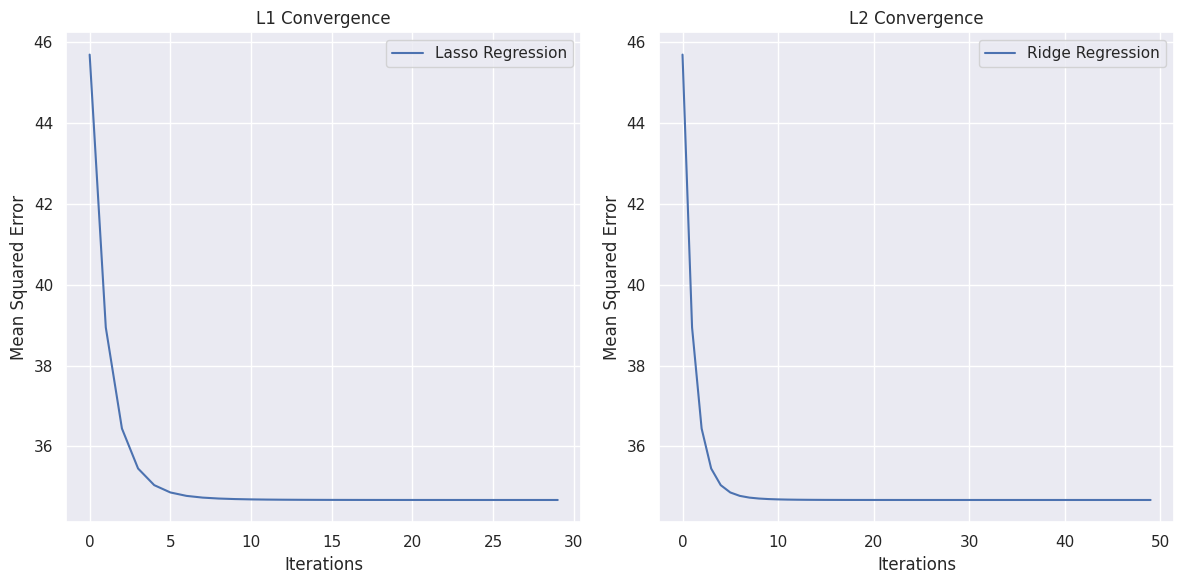

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(error_list_lasso, label='Lasso Regression')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('L1 Convergence')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(error_list_ridge, label='Ridge Regression')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('L2 Convergence')
plt.legend()

plt.tight_layout()
plt.show()






# **_5. Comparison of Logistic Regression and Least Squares Classification_**

## **_Logistic Regression_**

In [ ]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression():

    def __init__(self, lr=0.001, n_iters=10000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        cost_list = []

        for i in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)
            cost = -(1/n_samples)*np.sum(y*np.log(predictions) + (1-y)*np.log(1-predictions))

            dw = (1/n_samples) * np.dot(X.T, (predictions - y).T)
            db = (1/n_samples) * np.sum(predictions-y)

            cost_list.append(cost)
            if(i%(self.n_iters/10) == 0):
              print("cost after ", i, "iteration is : ", cost)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db
        return cost_list


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred


In [ ]:
X_log = generateXvector(X_train)
X_logTest = generateXvector(X_test)

cost after  0 iteration is :  0.6931471805599452
cost after  1000 iteration is :  0.6134086561511123
cost after  2000 iteration is :  0.5765561221433965
cost after  3000 iteration is :  0.5569942217389307
cost after  4000 iteration is :  0.5453202644522736
cost after  5000 iteration is :  0.5377180892762581
cost after  6000 iteration is :  0.5324460763933575
cost after  7000 iteration is :  0.5286214839538568
cost after  8000 iteration is :  0.5257552053288732
cost after  9000 iteration is :  0.5235552787850358
Accuracy: 79.49%


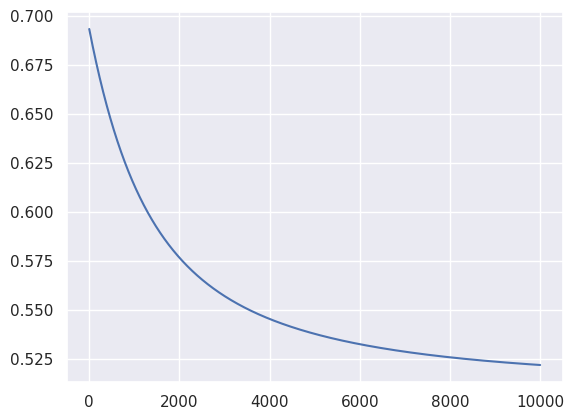

In [ ]:

clf = LogisticRegression(lr=0.001)

y_log_train = df_train['Outcome']
vectorX.shape
cost_list= clf.fit(X_log,y_log_train)
y_pred = clf.predict(X_logTest)
y_test=df_test['Outcome']
def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

acc = accuracy(y_pred, y_test)*100
print(f"Accuracy: {acc:.2f}%")
plt.plot(np.arange(10000), cost_list)
plt.show()


## **_Least Squares Classification_**

In [ ]:
class LeastSquareClassification(object):

    """ LSC model
    ------------------------------
    y = np.where(X#w >=0, 1, 0)
    X: A feature matrix
    w: weight vector
    y: label vector
    """

    def __init__(self):
        self.t0 = 20
        self.t1 = 1000


    def predict(self, X: np.ndarray):
        """ Prediction of output label for a given input.

        Args:
        X: Feature matrix for given inputs

        Returns:
        y: Output labels vector as predicted by the given model.

        """
        #Check to make sure that the shapes are compatible.
        assert X.shape[-1] == self.w.shape[0], f"X shape{X.shape} and w shape {self.w.shape}, are not compatible"

        return (X @ self.w)

    def loss(self, X: np.ndarray, y: np.ndarray, reg_rate: float):
        """  Calculate loss for a model based on known labels

        Args:
        X: Feature matrix for given inputs.
        y: Output label vector as predicted by the given model.
        """
        #cost_list=[]
        e = y - self.predict_internal(X)
        cost=(1/2) * (e.T@e) + (reg_rate/2)*(self.w).T@(self.w)
        #cost_list.append(cost)
        return cost

    def predict_internal(self, X: np.ndarray):
        """ Prediction of output label for a given input.

        Args:
        X: Feature matrix for given inputs

        Returns:
        y: Output label vector encoded in label encoder format.

        """
        #Check to make sure that the shapes are compatible.
        assert X.shape[-1] == self.w.shape[0], f"X shape {X.shape} and w shape {self.w.shape}, are not compatible"
        return X@self.w

    def rmse(self, X: np.ndarray, y: np.ndarray) -> float:
        ''' Calculates root mean squared error of prediction w.r.t. actual label:

        Args:
        X: Feature matrix for given inputs.

        Returns:
        y: Output label vector as predicted by the given model
        rmse
        '''

        return np.sqrt(2/X.shape[0] * self.loss(X, y, 0))

    def fit(self, X: np.ndarray, y: np.ndarray, reg_rate: float):
        ''''
        Estimates parameters of the linear regression model with normal equation.

        Args:
        X: Feature matrix for given inputs
        y: output label vector as predicted by the given model

        Returns:
        weight vector
        '''

        eye = np.eye(X.shape[1])
        self.w = np.linalg.solve(reg_rate*eye + X.T@X, X.T @ y)
        return self.w

    def calculate_gradient(self, X: np.ndarray, y: np.ndarray, reg_rate) -> np.ndarray:
        '''
        calculates gradients of loss function w.r.t weight vector on training set.

        Returns:
        A vector of gradient.
        '''

        grad = X.T @  (self.predict_internal(X)-y) + reg_rate * self.w
        return grad

    def update_weights(self, grad: np.ndarray, lr: float) -> np.ndarray:
        return(self.w - lr*grad)

    def learning_schedule(self, t):
        return self.t0/(t+self.t1)

    def gd(self, X: np.ndarray, y: np.ndarray, num_epochs: int, lr: float, reg_rate: float) -> np.ndarray:
        self.w = np.zeros(X.shape[1])
        self.w_all = []
        self.err_all = []
        for i in np.arange(0, num_epochs):
            djdw = self.calculate_gradient(X, y, reg_rate)
            lr = self.learning_schedule(num_epochs*X.shape[0]+i)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X, y, reg_rate))
            self.w = self.update_weights(djdw, lr)

        return self.w, self.err_all

[67.5, 67.35664628790748, 67.2139805350791, 67.0719990850315, 66.93069830271621, 66.79007457438345, 66.65012430744676, 66.51084393034873, 66.37222989242741, 66.23427866378371, 66.09698673514974, 65.96035061775802, 65.82436684321151, 65.6890319633545, 65.55434255014453, 65.42029519552494, 65.28688651129846, 65.15411312900163, 65.02197169977984, 64.89045889426362, 64.75957140244525, 64.62930593355678, 64.49965921594827, 64.37062799696734, 64.24220904283922, 64.11439913854772, 63.98719508771704, 63.86059371249422, 63.73459185343256, 63.609186369375664, 63.484374137342385, 63.36015205241246, 63.23651702761293, 63.1134659938053, 62.990995899573534, 62.86910371111268, 62.74778641211834, 62.62704100367681, 62.50686450415601, 62.38725394909707, 62.26820639110673, 62.14971889975038, 62.03178856144585, 61.9144124793579, 61.79758777329343, 61.681311579597335, 61.56558105104914, 61.45039335676026, 61.33574568207192, 61.22163522845386, 61.10805921340359, 60.995014870346395, 60.882499448535995, 60.7

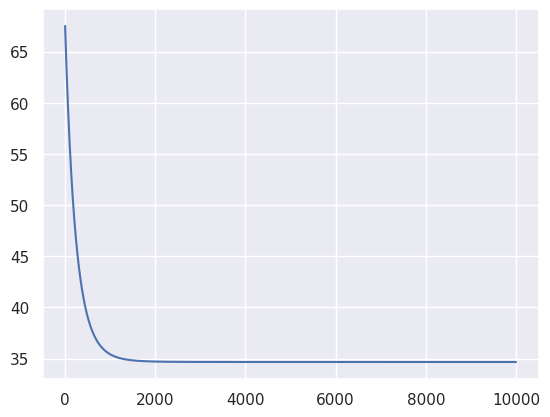

In [ ]:
X_lsc = generateXvector(X_train)
X_lscTest = generateXvector(X_test)
y_lsc_train = df_train['Outcome']

lsc= LeastSquareClassification()
lsc.fit(X_lsc,y_lsc_train,0.001)
weights, cost_list= lsc.gd(X_lsc,y_lsc_train, num_epochs=10000, lr=1e-3,reg_rate=0)
y_pred = lsc.predict(X_lscTest)

y_pred=np.round(y_pred)
#print(y_pred)
y_test=df_test['Outcome']
def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

acc = accuracy(y_pred, y_test)*100
print(cost_list)
print(f"Accuracy: {acc:.2f}%")
plt.plot(np.arange(10000), cost_list)
plt.show()

## **_Insights drawn (plots, markdown explanations)_**

Logistic Regression and Least Squares Classification are two different methods used for binary classification tasks.

--> Model Type:

Logistic Regression: Logistic regression is a probabilistic model that estimates the probability of the binary outcome (0 or 1) given the input features. It uses the logistic (sigmoid) function to model the relationship between the features and the output of the binary outcome.

Least Squares Classification: Least Squares Classification is a deterministic method that tries to fit a linear boundary (a hyperplane) that best separates the two classes in the feature space by minimizing the sum of squared errors.


--> Output:

Logistic Regression: Logistic regression produces probabilities between 0 and 1, which can be interpreted as the likelihood of belonging to one of the classes. You can set a threshold (usually 0.5) to make binary predictions.

Least Squares Classification: Least Squares Classification directly outputs a binary classification decision based on the linear combination of features. It assigns data points to the class with the highest score.


--> Handling Outliers:

Logistic Regression: Logistic regression is less sensitive to outliers because it models the probability and uses the logistic function to squash predictions into the (0, 1) range.

Least Squares Classification: Least Squares Classification can be sensitive to outliers because it minimizes the sum of squared errors and is influenced by extreme values.


--> Accuracy:

Logistic Regression: Logistic regression is well-suited for problems where the relationship between the features and the log-odds of the outcome is roughly linear. It often performs well when the classes are separable and is widely used in practice.

Least Squares Classification: Least Squares Classification may perform well when the classes are well-separated by a linear boundary, but it can be less robust when classes are overlapping or when outliers are present. It may not provide good accuracy in such cases.


--> Robustness:

Logistic Regression: Logistic regression is more robust in handling noisy data and is less affected by outliers due to its probabilistic nature.

Least Squares Classification: Least Squares Classification can be sensitive to outliers because it tries to minimize squared errors, which can be heavily influenced by extreme values.

For our dataset, while the accuracies came out to be similar for both, the major difference is the rate at which the loss function reaches minima.

In terms of accuracy, logistic regression is often preferred when dealing with binary classification tasks due to its probabilistic nature, robustness to outliers, and interpretability. Least Squares Classification may be suitable in cases where a linear decision boundary is appropriate and there are no significant outliers or class overlap. However, logistic regression is a more versatile and widely used method in practice for binary classification problems.

Logistic Regression

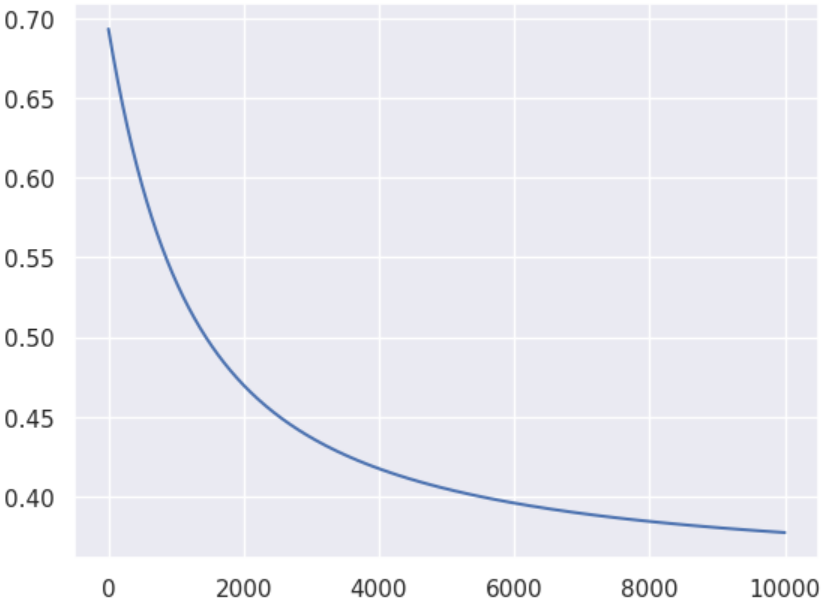


Least Square Classication

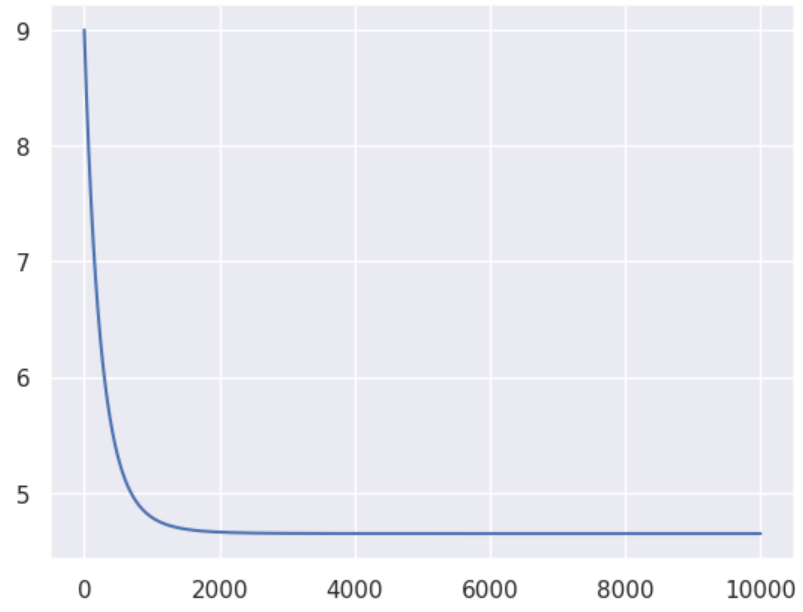

# **_5. References_**

Dataset Generation and Preprocessing of the Dataset.
1.   https://www.kaggle.com/code/imoore/intro-to-exploratory-data-analysis-eda-in-python


Comparison of stochastic Gradient Descent and Batch Gradient Descent using Linear Regression.
2.   https://www.youtube.com/watch?v=_g-rLDPbrgE&list=WL&index=8
3.   https://www.youtube.com/watch?v=WJl1H6WUXto&t=44s&pp=ygUzYmF0Y2ggZ3JhZGllbnQgZGVzY2VudCBpbXBsZW1lbnRhdGlvbiBtdWx0aXZhcmlhYmxl
4.   https://www.youtube.com/watch?v=qyGPheuLMYc&list=WL&index=7


Comparison of Lasso and Ridge Regression using Polynomial Regression
5.   https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/


Comparison of Logistic Regression and Least Squares Classification
6.   https://github.com/faizanxmulla/machine-learning-techniques/blob/main/W4%20-%20Least%20Square%20Classification/2LSC.ipynb
7.   https://github.com/AssemblyAI-Examples/Machine-Learning-From-Scratch






